# Ridge, Lasso
- diabets data
- Ridge 모델은 가중치 계수가 한번에 최소화 되고,
- Lasso 모델은 일부 가중치 계수가 먼저 0에 수렴한다.

In [3]:
from sklearn.datasets import load_diabetes

dia = load_diabetes()
X = dia.data
y = dia.target

X.shape, y.shape

((442, 10), (442,))

In [27]:
df_x = pd.DataFrame(X, columns=dia.feature_names)
df_y = pd.DataFrame(y, columns=["target"])
df = pd.concat([df_x, df_y], axis=1)
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [28]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [30]:
data = []
for i, a in enumerate(alpha) :
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [36]:
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha) :
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

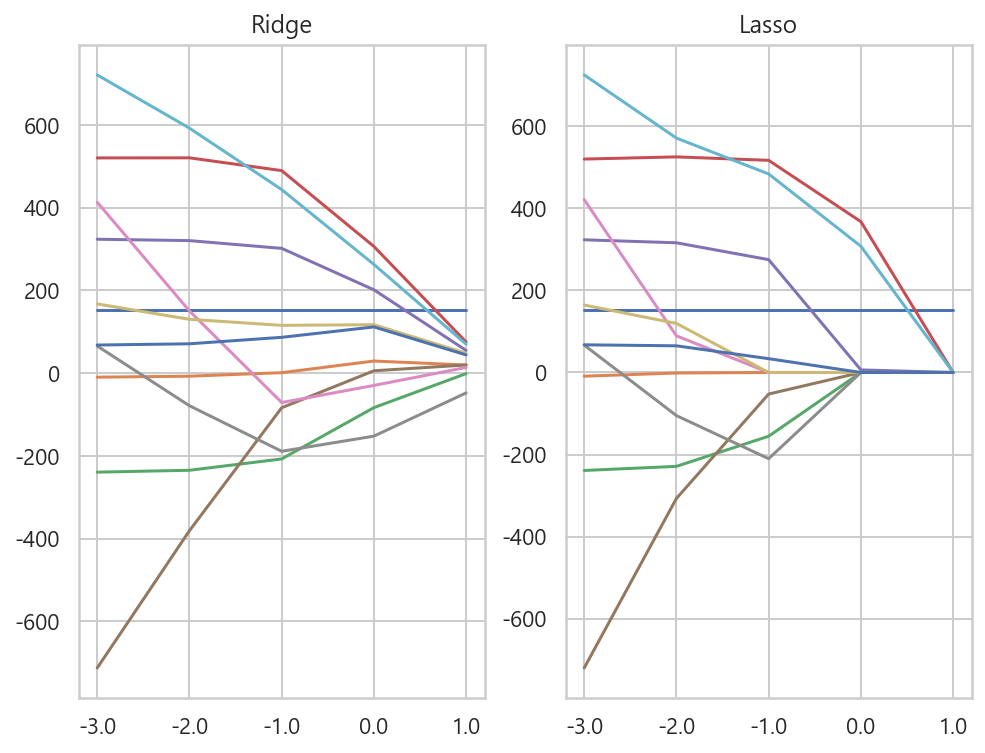

In [41]:
plt.figure(figsize=(8, 6))
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

plt.show() ; 

# hyper parameter 
- boston data
- Lasso 모델의 하이퍼 파라미터인 람다 값을 변화시켜주면 학습, 검증 성능이 변화한다.

In [42]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

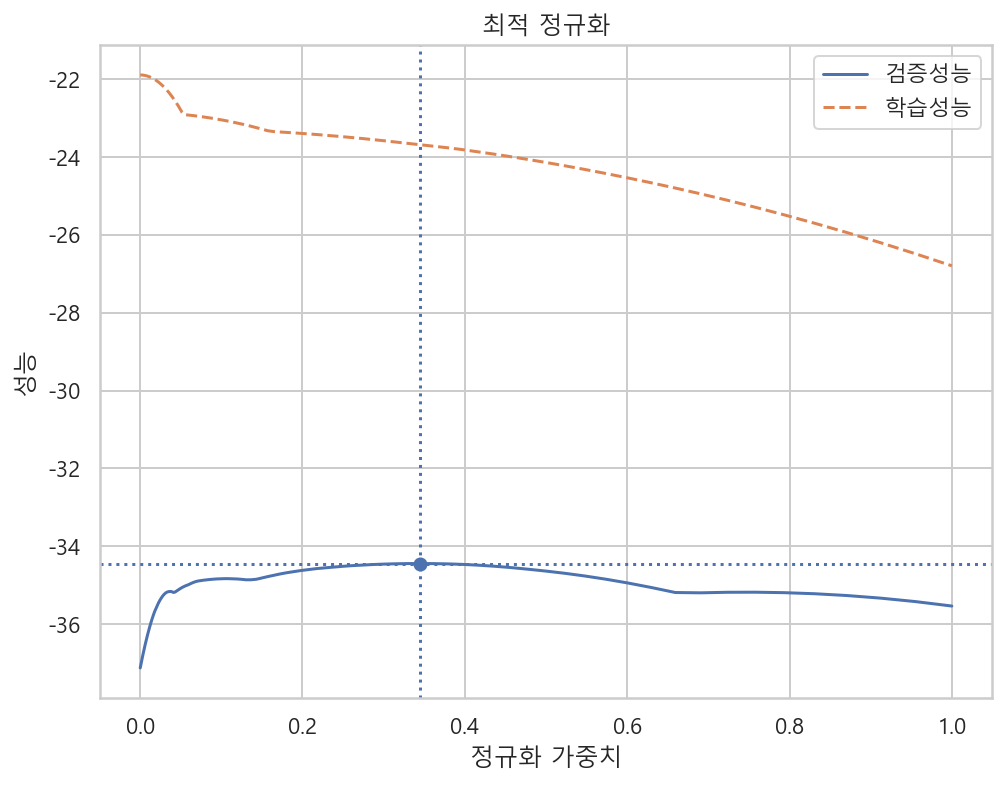

In [51]:
boston = load_boston()
X = boston.data
y = boston.target

alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []

for a in alphas :
    model = Lasso(alpha=a)
    train_score = -mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(
        cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)
    
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.figure(figsize=(8, 6))
plt.plot(alphas, test_scores, "-", label="검증성능")
plt.plot(alphas, train_scores, "--", label="학습성능")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.ylabel("성능")
plt.xlabel("정규화 가중치")
plt.legend()
plt.show() ; 

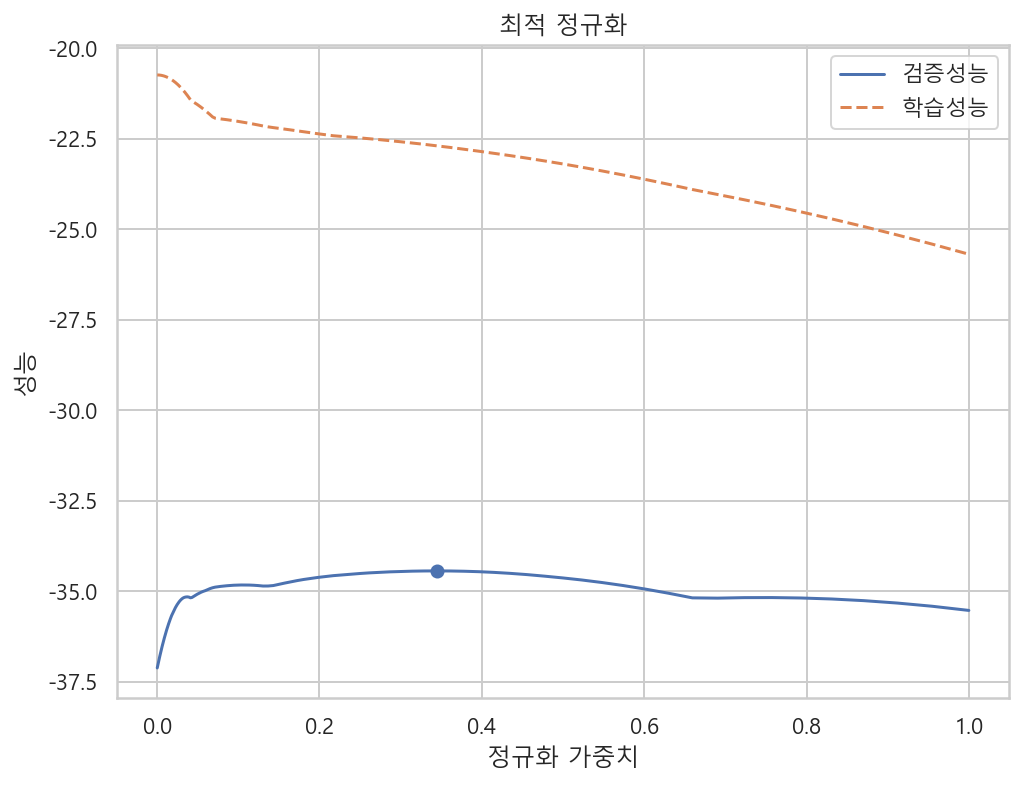

In [74]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    Lasso(), 
    X, y, 
    param_name="alpha", 
    param_range=alphas, 
    cv=5, 
    scoring="neg_mean_squared_error")

optimal_alpah = alphas[np.argmax(np.mean(test_scores, axis=1))]
optimal_score = np.max(np.mean(test_scores, axis=1))

plt.figure(figsize=(8, 6))
plt.plot(alphas, test_scores.mean(axis=1), "-", label="검증성능")
plt.plot(alphas, train_scores.mean(axis=1), "--", label="학습성능")
plt.scatter(optimal_alpha, optimal_score)
plt.xlabel("정규화 가중치")
plt.ylabel("성능")
plt.title("최적 정규화")
plt.legend()
plt.show() ; 